**Laboratorio II**  
**Inteligencia Artificial**   
**Andres Guillermo Velasquez Gomez**


El archivo ejemplo regresion.mat contiene los vectores x, y y t. En este ejemplo, x ∈ R (el espacio de entrada es unidimensional), los datos de entrada está agrupados en el vector x, los datos de salida sin ruido están agrupados en el vector y, y los datos de salida con ruido están agrupados en el vector t.
Usando validación cruzada de cinco particiones, evalúe el desempeño de los siguientes algoritmos de regresión en funcíon de M (el número de funciones base), N (el número de datos de entrenamiento), y φ(·) (el tipo de funcíon base),

* Regresión lineal con máxima verosimilitud.

* Regresión lineal con regularización cuadrática. 

* Regresión Bayesiana lineal. 

Reporte la media y desviación estándar de las cinco validaciones. La medida de desempeño es el error cuadrático medio.

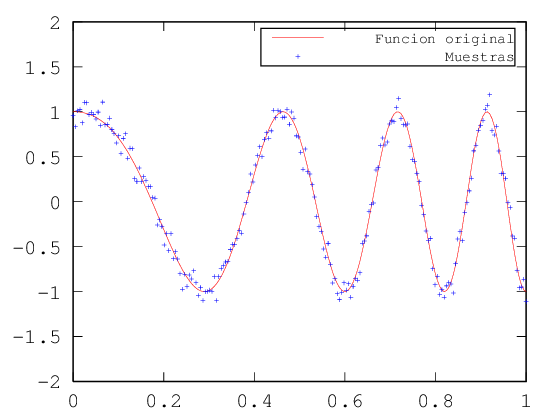

In [161]:
clear all
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;
plot(xNtot,yNtot,'r');
hold on;
ylim([-2 2])
plot(xNtot,tNtot,'+','MarkerSize',2);
h_legend=legend('Funcion original','Muestras');
set(h_legend,'FontSize',7);


#1. Regresión Lineal con máxima verosimilitud

A continuación se calcula la regresion lineal con maxima verosimilitud, variando la cantidad de funciones bases (M) el numero de datos de entrenamiento(N) y el tipo de las funcienes base. 

In [173]:
w = warning ('off','all');
tipofb='exp';

Ntot=size(xNtot,1);
N=Ntot/5;
index=randperm(Ntot);

B_test=[];
Mean_aux=[];
std_aux=[];
Mean_result=[];
std_result=[];
for j=1:4
    Mean_aux=[];
    std_aux=[];
    for M=10:10:100
        B_test=[];
        for i=1:5
            t=tNtot(index(1:j*N));
            x=xNtot(index(1:j*N));
            ttest=tNtot(index(j*N+1:end));
            xtest=xNtot(index(j*N+1:end));
           
            [Wml,B]=RLMV(x,t,M,xtest,ttest,tipofb);
            B_test=[B_test B];
            tNtot=[tNtot(index(j*N+1:end)); tNtot(index(1:j*N))];
            xNtot=[xNtot(index(j*N+1:end)); xNtot(index(1:j*N))];            
        end
        Mean_aux=[Mean_aux mean(B_test)];
            std_aux=[std_aux std(B_test)];
    end
    Mean_result=[Mean_result;Mean_aux];
    std_result=[std_result;std_aux];
end

Calculo del error promedio para la la validación cruzada de 5 diviciones utilizado funciones bases exponeciales:
###Funciones Base Exponenciales :
####Media del Error :
|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.42966|1.5429|0.33431|0.31964|
|20|3.2915|0.012648|0.84327|0.031416|
|30|2.1727|0.013183|0.010187|**0.0092983**|
|40|0.045941|0.015817|0.025409|0.0098922|
|50|310.6032|0.031957|0.010288|0.02483|
|60|225.8526|0.045192|0.011731|0.011997|
|70|5.363|0.76969|16.4272|0.014936|
|80|38.8708|0.32543|0.013225|0.018426|
|90|81.1018|0.2445|0.016227|0.011322|
|100|**6956.5691**|0.08687|0.016829|0.012176|

####Desviacion estandar:

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.13353|2.7703|0.051722|0.027578|
|20|6.9111|0.0021158|1.8592|0.04174|
|30|3.5484|0.005592|0.0009137|**0.001209**|
|40|0.041782|0.0031064|0.023521|0.0016325|
|50|693.5123|0.020441|0.0011731|0.034338|
|60|352.8351|0.042113|0.0028908|0.0023085|
|70|8.5472|1.6621|36.7026|0.0043675|
|80|86.3708|0.43615|0.0022092|0.013896|
|90|139.9689|0.50487|0.0057557|0.0030227|
|100|**14228.3233**|0.14098|0.0043969|0.0022975|


###Funciones Base Polinomicas :

#### Media del Error :

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.38292|1.7925|0.39981|0.24724|
|20|34.9734|0.29864|0.058969|0.016533|
|30|1.55|0.013051|103.1507|0.0253|
|40|96.6696|14.0736|0.01891|0.012514|
|50|160.0123|0.329|0.033471|0.010521|
|60|0.11989|156.0234|0.21425|0.013119|
|70|330.1003|205.652|890898.8277|0.44887|
|80|162.7966|21118.3405|0.81937|0.0097191|
|90|52120.1562|3.9269|290.0677|0.0096464|
|100|**1660638379.2835**|25061.6211|0.13301|**0.0091222**|

####Desviacion Estandar : 

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.14252|3.1302|0.3684|0.041155|
|20|77.5283|0.5689|0.09803|0.003173|
|30|2.2927|0.0030408|230.5734|0.030252|
|40|215.7554|22.008|0.013308|0.0064304|
|50|217.9143|0.55683|0.020671|0.0026219|
|60|0.1276|348.7078|0.45751|0.0045396|
|70|714.7825|448.3395|1992102.7661|0.98321|
|80|356.6743|47139.34|1.7804|0.001554|
|90|68681.5563|7.2807|648.5063|0.0016909|
|100|**3713298491.4579**|56032.7759|0.27133|**0.0014658**|

###Funciones Base Tan :
#### Media del Error :

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.1877|1.1028|0.1663|0.15465|
|20|0.5553|0.014971|0.027931|0.011012|
|30|44.3715|0.017187|0.010394|0.019497|
|40|0.10406|0.01399|0.012031|0.011119|
|50|6.794|0.029312|**0.010285**|0.01294|
|60|1.1417|0.046115|0.011683|0.011826|
|70|0.739|0.27566|7.0459|0.084147|
|80|18.8297|0.39128|0.01336|0.014853|
|90|179.0899|0.017862|0.014344|0.012044|
|100|**25902.2357**|0.027553|0.018115|0.041577|

####Desviacion Estandar : 
|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|0.052094|2.0536|0.052506|0.019287|
|20|0.94066|0.0054297|0.035555|0.0029802|
|30|99.1778|0.014849|0.0013218|0.02133|
|40|0.18502|0.0016165|0.0053704|0.0028691|
|50|10.5144|0.015479|**0.0012603**|0.0060017|
|60|1.0117|0.072074|0.0021037|0.0020925|
|70|1.0753|0.49928|15.7236|0.16164|
|80|25.67|0.78075|0.0035433|0.0045223|
|90|397.3242|0.0037232|0.0066974|0.0033715|
|100|**57909.3149**|0.017044|0.011406|0.071404|


##Funciones Base Exponencial.

A continuacion las graficas para cada uno de los parametros con menor y mayor error medio en la evaluacion de 5 particiones.

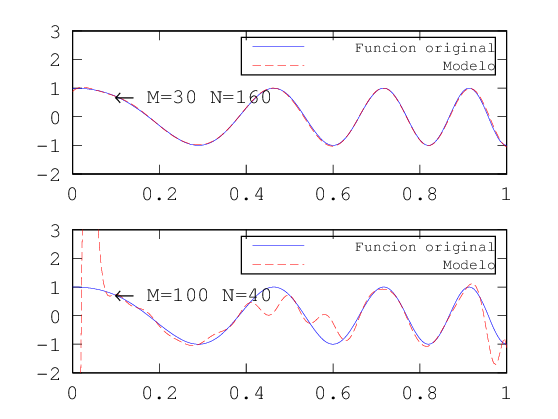

In [163]:
load('exp_W.mat');
PHI=genBasisFunction('exp',data.x,size(data.x,1),size(W_min,1))
subplot(2,1,1)
plot(data.x, data.y,data.x,PHI*W_min,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_min) ' N=' num2str(N_min)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

PHI=genBasisFunction('exp',data.x,size(data.x,1),size(W_max,1))
subplot(2,1,2)
plot(data.x, data.y,data.x,PHI*W_max,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_max) ' N=' num2str(N_max)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);


##Funciones Base Polinomicas.

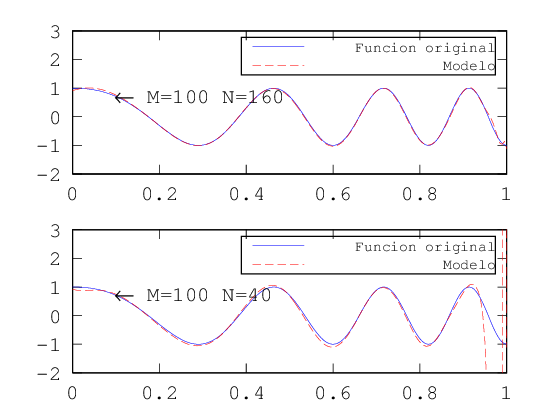

In [164]:
load('poly_W.mat');
PHI=genBasisFunction('poly',data.x,size(data.x,1),size(W_min,1))
subplot(2,1,1)
plot(data.x, data.y,data.x,PHI*W_min,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_min) ' N=' num2str(N_min)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

PHI=genBasisFunction('poly',data.x,size(data.x,1),size(W_max,1))
subplot(2,1,2)
plot(data.x, data.y,data.x,PHI*W_max,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_max) ' N=' num2str(N_max)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

##Funciones Base Tanjente.

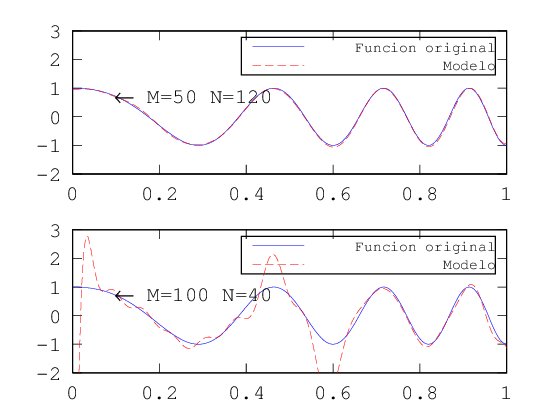

In [165]:
load('tan_W.mat');
PHI=genBasisFunction('tan',data.x,size(data.x,1),size(W_min,1))
subplot(2,1,1)
plot(data.x, data.y,data.x,PHI*W_min,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_min) ' N=' num2str(N_min)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

PHI=genBasisFunction('tan',data.x,size(data.x,1),size(W_max,1))
subplot(2,1,2)
plot(data.x, data.y,data.x,PHI*W_max,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_max) ' N=' num2str(N_max)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

#2. Regresión Lineal con máxima verosimilitud y regularizacion cuadratica

###Funciones Base Exponenciales :
####Media del Error :

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|**37.5682**|25.2147|17.891|9.0911|
|20|30.8701|19.945|13.8388|7.5428|
|30|30.1307|18.1215|12.5706|6.7524|
|40|16.3932|11.8015|8.8892|6.0626|
|50|11.9197|7.1538|4.6569|4.077|
|60|5.8435|3.4815|2.8291|2.4024|
|70|4.1444|2.2186|2.814|1.4487|
|80|2.5164|1.4879|1.1918|0.89474|
|90|1.6431|1.1004|0.83353|0.61418|
|100|1.4995|0.90807|0.66093|**0.45605**|

####Desviación Estandar : 
|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|**5.7817**|2.6068|2.4542|1.6024|
|20|4.0406|1.3987|0.44586|1.8913|
|30|7.5421|1.0161|2.1054|0.58763|
|40|0.90752|1.3757|0.89661|0.36885|
|50|2.6257|1.178|0.18325|0.14461|
|60|1.0693|0.3628|0.14711|0.058172|
|70|0.68149|0.28031|2.3663|0.048886|
|80|0.52128|0.22038|0.1017|0.025926|
|90|0.19567|0.084033|0.031862|0.031358|
|100|0.2778|0.049423|0.049782|**0.01626**|

###Funciones Base Polinomicas :
####Media del Error :

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|39.3008|29.6545|20.2957|10.3545|
|20|41.5458|28.0239|18.8955|9.6544|
|30|39.6937|27.9196|20.0543|10.0024|
|40|37.1167|28.9796|19.4755|**9.5727**|
|50|43.3185|31.487|18.7065|10.4584|
|60|38.4144|36.8191|17.5735|10.816|
|70|38.6711|**52.3331**|19.7474|10.0947|
|80|38.4776|32.964|18.5389|10.2026|
|90|39.2933|26.835|18.5274|10.9614|
|100|50.6269|27.1195|18.2659|10.2291|

####Desviación Estandar:
|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|2.3701|4.0412|1.7442|1.4118|
|20|3.4394|2.112|0.74984|1.3256|
|30|3.3542|1.3011|1.0645|0.53339|
|40|2.0135|1.3056|1.0467|**2.1903**|
|50|5.0027|5.698|0.86043|0.67056|
|60|1.9843|20.5779|1.0059|1.2028|
|70|3.2808|**40.218**|5.1838|0.74083|
|80|3.5734|13.3445|1.8142|1.0438|
|90|3.4803|0.66763|1.2075|0.8463|
|100|27.075|1.8533|1.7181|0.74753|

###Funciones Base Tangencial :
####Media del Error :

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|38.1499|29.2171|19.8813|10.5166|
|20|**39.0335**|25.6435|18.0572|9.4296|
|30|35.4037|26.3883|17.9586|8.9802|
|40|31.5424|23.5644|17.1775|8.2978|
|50|31.7517|23.2338|14.1601|8.1839|
|60|28.5806|19.9199|13.4391|7.9402|
|70|28.6247|21.1408|16.2997|7.7276|
|80|28.9765|17.6962|13.9209|7.4788|
|90|24.3107|15.3219|11.7413|8.0116|
|100|24.1694|13.9728|9.7066|**7.3822**|

####Desviación Estandar:

|M\N| 40        | 80           | 120  |160|
|:--:| :-------------: |:-------------:| :-----:| :-----:|
|10|1.764|3.7411|1.4686|1.4991|
|20|**3.5052**|2.302|0.74277|1.9447|
|30|2.1842|1.6238|1.699|0.3678|
|40|1.4718|1.2362|2.1188|2.1657|
|50|2.4513|1.25|0.3165|0.47068|
|60|2.034|2.4619|1.7007|0.77142|
|70|2.7477|2.0153|7.4891|0.68465|
|80|8.5603|1.4097|1.6734|0.65498|
|90|3.2488|1.2507|0.66477|0.3365|
|100|2.6661|1.819|0.48366|**0.33434**|

##Funciones Base Exponencial.

A continuacion las graficas para cada uno de los parametros con menor y mayor error medio en la evaluacion de 5 particiones.

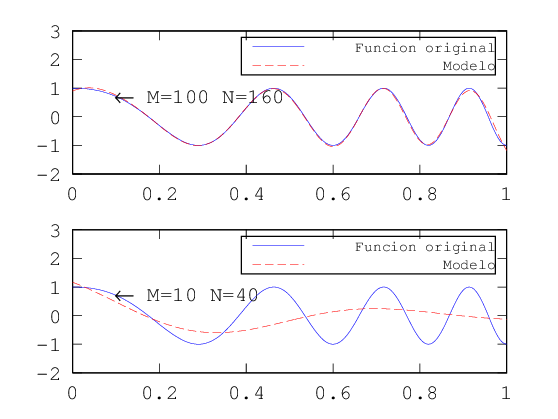

In [166]:
load('exp_WR.mat');
PHI=genBasisFunction('exp',data.x,size(data.x,1),size(W_min,1))
subplot(2,1,1)
plot(data.x, data.y,data.x,PHI*W_min,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_min) ' N=' num2str(N_min)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

PHI=genBasisFunction('exp',data.x,size(data.x,1),size(W_max,1))
subplot(2,1,2)
plot(data.x, data.y,data.x,PHI*W_max,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_max) ' N=' num2str(N_max)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

##Funciones Base Polinomicas. 

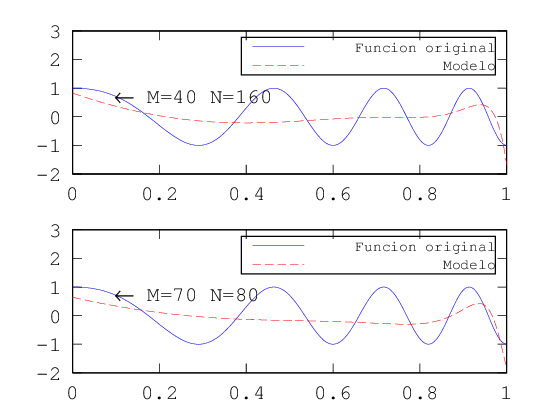

In [167]:
load('poly_WR.mat');
PHI=genBasisFunction('poly',data.x,size(data.x,1),size(W_min,1))
subplot(2,1,1)
plot(data.x, data.y,data.x,PHI*W_min,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_min) ' N=' num2str(N_min)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

PHI=genBasisFunction('poly',data.x,size(data.x,1),size(W_max,1))
subplot(2,1,2)
plot(data.x, data.y,data.x,PHI*W_max,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_max) ' N=' num2str(N_max)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

##Funciones Base Tanjente.

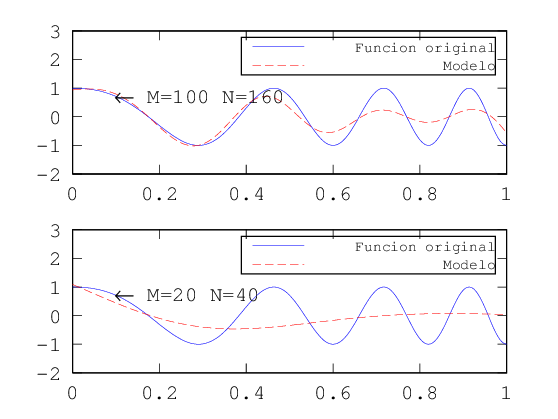

In [168]:
load('tan_WR.mat');
PHI=genBasisFunction('tan',data.x,size(data.x,1),size(W_min,1))
subplot(2,1,1)
plot(data.x, data.y,data.x,PHI*W_min,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_min) ' N=' num2str(N_min)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

PHI=genBasisFunction('tan',data.x,size(data.x,1),size(W_max,1))
subplot(2,1,2)
plot(data.x, data.y,data.x,PHI*W_max,'r--');
h_legend=legend('Funcion original','Modelo');
set(h_legend,'FontSize',7);
str1 = ['\leftarrow M=' num2str(M_max) ' N=' num2str(N_max)];
text(data.x(20),data.y(20),str1)
ylim([-2 3]);

#3. Regresíon Bayesiana lineal

In [169]:
%reset workspace

clear all
plot_variance = @(x,lower,upper,color) set(fill([x,x(end:-1:1)],[upper,lower(end:-1:1)],'b'),'EdgeColor',color,'FaceAlpha',0.3,'EdgeAlpha',0.3);
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;

Se separan los datos de entrenamiento y validación.

In [170]:
Ntot=size(xNtot,1);
N=100;
index=randperm(Ntot);
t=tNtot(index(1:N));
x=xNtot(index(1:N));
tipofb='exp';
M=30;
ttest = tNtot(index(N+1:end));
xtest = xNtot(index(N+1:end));

Se calcula la matriz de diseño para lso datos de entrenamiento.

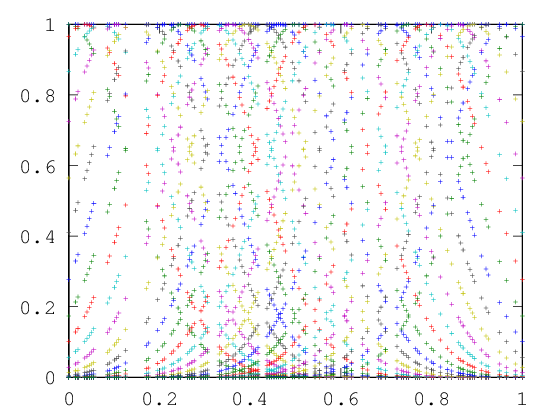

In [171]:
PHI=genBasisFunction(tipofb,x,N,M);
plot(x, PHI,'+','MarkerSize',2);

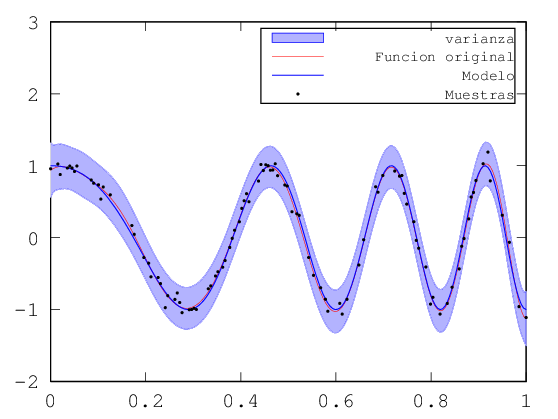

In [172]:
[alpha,betae]=findAlphaBeta(PHI,M,N,t);

PHIt = genBasisFunction(tipofb,xNtot,Ntot,M);
SnInv = alpha*(length(x)) + betae*(PHI'*PHI);
Sn = SnInv\eye(M);
mn = betae*(Sn*PHI'*t);
mean_pre=PHIt*mn;
varianza=inv(betae*eye(length(xNtot)))+PHIt*Sn*PHIt';
varianza=diag(sqrt(varianza'));
figure
hold on
plot_variance(xNtot',(mean_pre-2*varianza)',(mean_pre+2*varianza)',[1 1 1])
plot(xNtot,mean_pre,'r')
plot(xNtot, yNtot, 'b', 'linewidth', 1.5)
plot(x, t, '.k', 'markersize', 4)
set(gca, 'ylim', [-2 3])
h_legend=legend('varianza','Funcion original','Modelo','Muestras');
set(h_legend,'FontSize',7);